In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif
import os
# 1. 数据加载和预处理
os.makedirs("./Figure", exist_ok=True)


# 如果从剪贴板读取有问题，可以手动创建DataFrame
# 这里我根据您提供的数据结构手动创建DataFrame
data = pd.DataFrame({
    'Case': [1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,6,6,6,7,7,7,8,8,8,9,9,9,10,10,10,11,11,11],
    'GA': [24.71,24.71,24.71,24.14,24.14,24.14,24.00,24.00,24.00,25.43,25.43,25.43,
           26.14,26.14,26.14,28.00,28.00,28.00,26.43,26.43,26.43,35.29,35.29,35.29,
           24.57,24.57,24.57,33.00,33.00,33.00,26.71,26.71,26.71],
    'plane': ['PA','DA','AO']*11,
    'BFS': [17.226,17.221,17.320,17.552,17.144,17.288,17.249,17.173,17.376,17.287,17.283,17.040,
            17.393,17.195,17.555,17.379,17.530,17.575,17.495,17.225,17.569,17.639,17.320,17.373,
            17.443,17.350,17.218,17.716,17.571,17.644,np.nan,np.nan,np.nan],
    'IMT': [356.30,564.05,525.90,267.70,633.15,281.60,369.90,383.00,420.10,377.70,775.30,493.20,
            471.20,798.45,586.50,450.10,457.55,488.10,571.80,712.55,793.80,490.00,480.00,400.00,
            543.00,453.55,394.50,380.00,400.70,330.00,np.nan,np.nan,np.nan],
    'Echo_Diameter': [4.30,2.00,3.70,5.40,3.50,2.45,np.nan,np.nan,np.nan,6.10,2.30,2.40,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      5.20,3.00,3.90,7.10,4.30,3.40,5.20,3.50,4.10],
    'ECHO_velocity': [57.00,63.00,63.00,57.00,75.00,56.00,np.nan,np.nan,np.nan,53.60,46.00,56.00,
                      np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                      87.00,71.00,93.97,103.00,139.00,130.00,64.00,87.00,87.50],
    'CFD_Pressure': [-0.10,-1.41,0.16,-0.62,-1.23,-1.94,np.nan,np.nan,np.nan,-0.10,-0.43,2.56,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     -0.17,-1.70,2.28,-1.52,-6.57,0.91,-0.38,-2.97,-0.72],
    'CFD_WSS': [8.28,159.86,45.53,82.34,98.03,130.24,np.nan,np.nan,np.nan,9.72,67.29,165.79,
                np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                19.91,176.49,110.83,171.40,539.85,111.55,39.22,191.19,186.88],
    'CFD_Q': [1.33,1.33,6.28,7.41,7.41,7.41,np.nan,np.nan,np.nan,1.62,1.62,-1.15,
              np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
              2.62,2.62,7.81,14.47,14.47,5.90,2.64,2.64,5.17],
    'CFD_Velocity': [14.30,56.45,45.67,47.77,62.33,72.11,np.nan,np.nan,np.nan,14.53,29.15,83.05,
                     np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                     22.15,64.20,56.61,93.95,142.08,63.90,31.09,82.39,74.08],
    'cardiac_abnormal': [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0]
})
# 缺失值统计
missing_summary = data.isnull().sum()
print(missing_summary)



Case                 0
GA                   0
plane                0
BFS                  3
IMT                  3
Echo_Diameter       15
ECHO_velocity       15
CFD_Pressure        15
CFD_WSS             15
CFD_Q               15
CFD_Velocity        15
cardiac_abnormal     0
dtype: int64


In [7]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === 创建两级输出目录 ===
os.makedirs("./Figure", exist_ok=True)

# === 数据分组聚合 ===
grouped = data.groupby('Case').agg({
    'GA': 'first',
    'BFS': 'mean',
    'IMT': 'mean',
    'Echo_Diameter': 'mean',
    'ECHO_velocity': 'mean',
    'CFD_Pressure': 'mean',
    'CFD_WSS': 'mean',
    'CFD_Q': 'mean',
    'CFD_Velocity': 'mean',
    'cardiac_abnormal': 'first'
}).reset_index()

features = ['BFS', 'IMT', 'Echo_Diameter', 'ECHO_velocity',
            'CFD_Pressure', 'CFD_WSS', 'CFD_Q', 'CFD_Velocity']



         Feature   F_score   p_value
3  ECHO_velocity  8.580093  0.061041
2  Echo_Diameter  5.889635  0.093593
0            BFS  3.411286  0.161912
5        CFD_WSS  2.498636  0.212080
7   CFD_Velocity  1.540988  0.302687
6          CFD_Q  1.331201  0.332167
1            IMT  0.739670  0.453008
4   CFD_Pressure  0.432641  0.557661


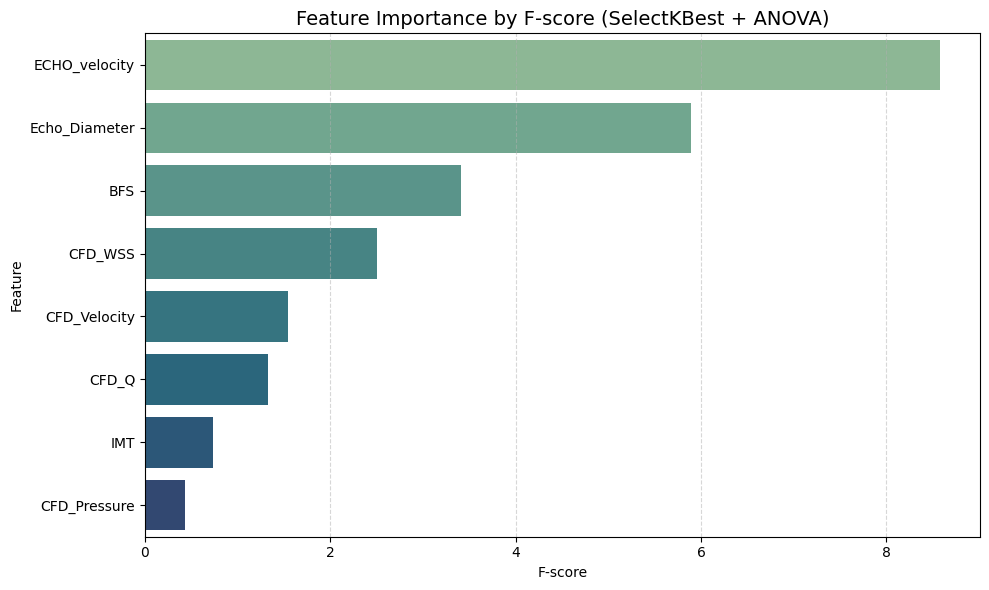

In [8]:
from sklearn.feature_selection import SelectKBest, f_classif

X = grouped[features]
y = grouped['cardiac_abnormal']

# 去除NaN行
X = X.dropna()
y = y.loc[X.index]

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# 展示评分
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_score': selector.scores_,
    'p_value': selector.pvalues_
}).sort_values(by='F_score', ascending=False)

print(feature_scores)


# 可视化
plt.figure(figsize=(10, 6))

sns.barplot(
    data=feature_scores,
    x='F_score', y='Feature',
    hue='Feature',
    palette='crest',
    legend=False  # 不需要图例
)

plt.title('Feature Importance by F-score (SelectKBest + ANOVA)', fontsize=14)
plt.xlabel('F-score')
plt.ylabel('Feature')
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

roc_save_path = "./Figure/Feature Importance.png"
plt.savefig(roc_save_path, dpi=300, bbox_inches='tight')
plt.show()

#X轴：变量的 F 分数（越高表示区分力越强）

#Y轴：变量名

#颜色：使用 Seaborn 风格色带增强可读性